### Imports and setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/flipkart_cleaned.csv")

sns.set_theme(style="whitegrid")

## Retail Price Distribution

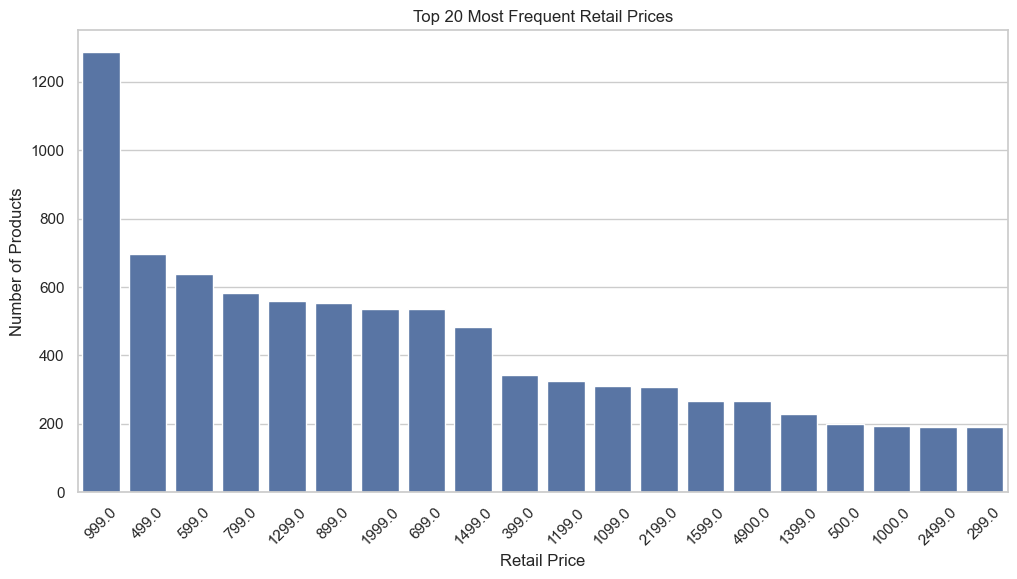

In [3]:
top_prices = df['retail_price'].value_counts().head(20).reset_index()
top_prices.columns = ["retail_price", 'count']

top_prices_df = top_prices.sort_values(ascending=False, by="count")

plt.figure(figsize=(12, 6))
sns.barplot(x='retail_price', y='count', data=top_prices_df, order=top_prices_df['retail_price'])
plt.title("Top 20 Most Frequent Retail Prices")
plt.xlabel("Retail Price")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

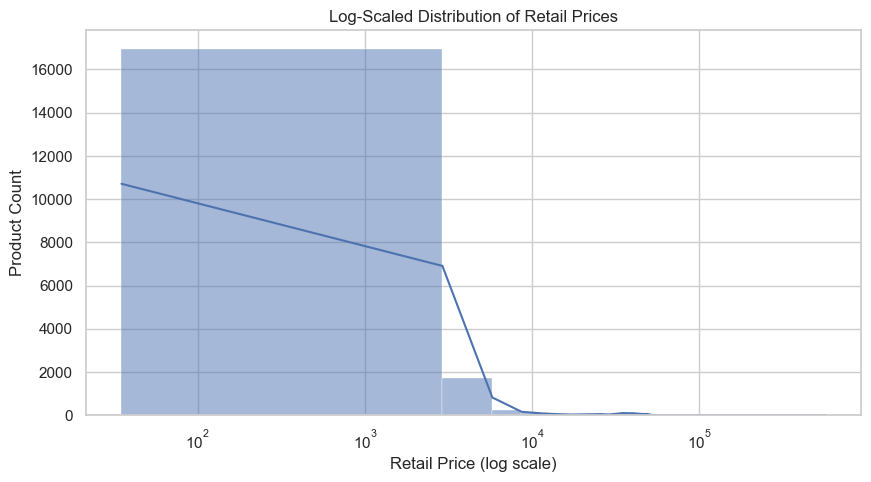

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['retail_price'], bins=200, kde=True)
plt.xscale('log')
plt.title("Log-Scaled Distribution of Retail Prices")
plt.xlabel("Retail Price (log scale)")
plt.ylabel("Product Count")
plt.show()

## Discount % Analysis

In [5]:
df['discount_percent'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100
df['discount_percent'].describe()

count    19917.000000
mean        40.529233
std         23.544764
min          0.000000
25%         21.099084
50%         45.000000
75%         59.973316
max         96.533333
Name: discount_percent, dtype: float64

### Discount Percent Distribution

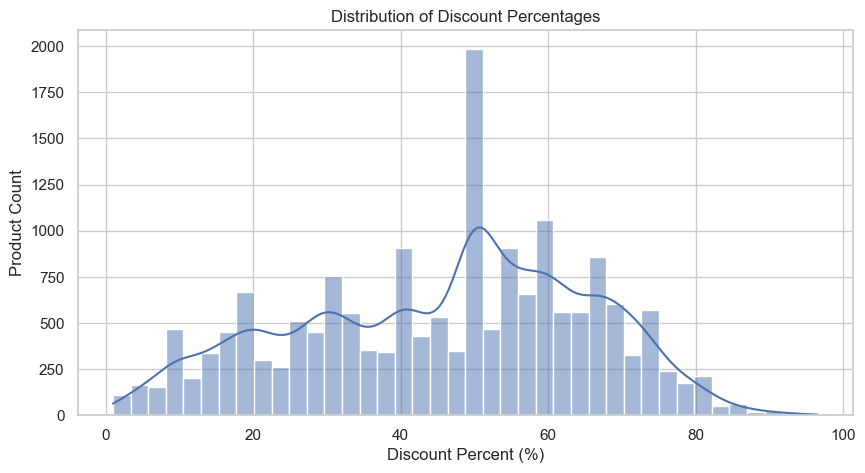

In [6]:
discounted_df = df[df['discount_percent'] > 0]

plt.figure(figsize=(10, 5))
sns.histplot(discounted_df['discount_percent'], bins=40, kde=True)
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount Percent (%)")
plt.ylabel("Product Count")
plt.show()

### Top Brands by Average Discount

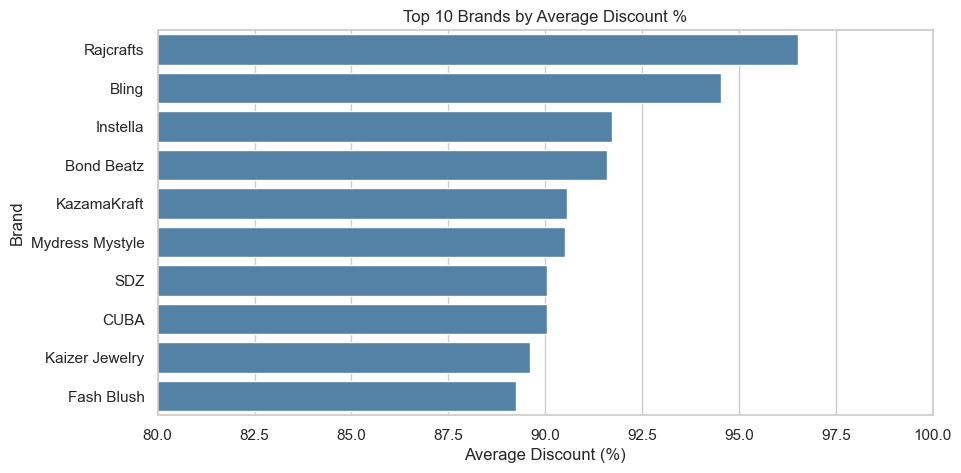

In [7]:
top_discount_brands = (
    discounted_df.groupby('brand')['discount_percent']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_discount_brands.values, y=top_discount_brands.index, color='steelblue')
plt.title("Top 10 Brands by Average Discount %")
plt.xlabel("Average Discount (%)")
plt.xlim(80, 100)
plt.ylabel("Brand")
plt.show()

### Extreme Discounts

In [8]:
df[df['discount_percent'] > 90].sort_values(by='discount_percent', ascending=False).head(5).iloc[:, [3, 4, 6, 7, 8, 10, 13, 15]]

,product_name,product_category_tree,retail_price,discounted_price,image,description,brand,discount_percent
17127,Rajcrafts Floral Double Quilts & Comforters White,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",6000.0,208.0,"[""http://img5a.flixcart.com/image/blanket/4/j/...",Rajcrafts Floral Double Quilts & Comforters Wh...,Rajcrafts,96.533333
7265,FashBlush Forever New Orange Bead & Chain Allo...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",3999.0,189.0,"[""http://img6a.flixcart.com/image/necklace-cha...",FashBlush Forever New Orange Bead & Chain Allo...,FashBlush,95.273818
6549,FashBlush Forever Beautiful White Bead Alloy N...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",3499.0,189.0,"[""http://img5a.flixcart.com/image/necklace-cha...",FashBlush Forever Beautiful White Bead Alloy N...,FashBlush,94.598457
10899,Bling Book Case for iPad 2 / 3,"[""Mobiles & Accessories >> Tablet Accessories ...",1816.0,99.0,"[""http://img6a.flixcart.com/image/cases-covers...",Buy Bling Book Case for iPad 2 / 3 only for Rs...,Bling,94.548458
6351,FashBlush Forever New BlackBead & LongChain Al...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",4999.0,279.0,"[""http://img6a.flixcart.com/image/necklace-cha...",FashBlush Forever New BlackBead & LongChain Al...,FashBlush,94.418884


## Price Range Buckets

### Creating a Price Range Column

In [9]:
def price_range_bucket(p):
    if p < 500:
        return '< 500'
    elif p < 1000:
        return '500-999'
    else:
        return '1000+'

df['price_range'] = df['discounted_price'].apply(price_range_bucket)
df['price_range'].value_counts()

price_range
< 500      9384
500-999    5607
1000+      4926
Name: count, dtype: int64

### Count of Products in Each Bucket

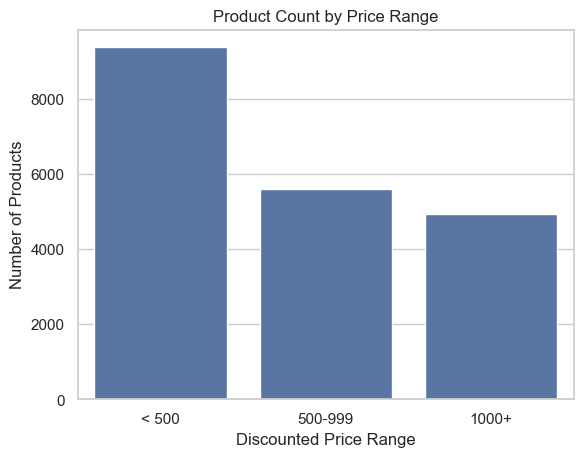

In [10]:
sns.countplot(data=df, x='price_range', order=['< 500', '500-999', '1000+'])
plt.title("Product Count by Price Range")
plt.xlabel("Discounted Price Range")
plt.ylabel("Number of Products")
plt.show()

### Average Discount % by Price Range

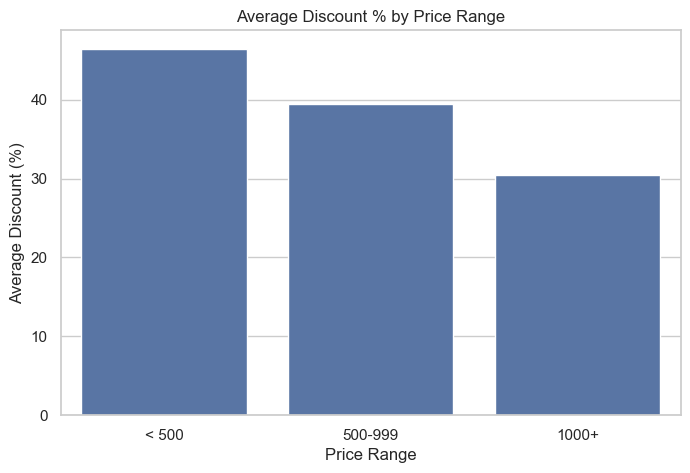

In [11]:
avg_discount_by_range = (
    df.groupby('price_range')['discount_percent']
    .mean()
    .reindex(['< 500', '500-999', '1000+'])
)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_discount_by_range.index, y=avg_discount_by_range.values)
plt.title("Average Discount % by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Discount (%)")
plt.show()

## Top 10 Most Expensive Products

In [28]:
top_expensive = df.sort_values(by="retail_price", ascending=False).drop_duplicates(subset="product_name").head(10)
top_expensive[["product_name", "brand", "retail_price", "discounted_price"]]

,product_name,brand,retail_price,discounted_price
113,Breitling AB011010/BB08 131S Chronomat 44 Anal...,Unknown,571230.0,571230.0
11578,Durian Leather 2 Seater Sofa,Durian,250500.0,162825.0
11455,Durian Laze/3 Leather 3 Seater Sofa,Durian,217500.0,141375.0
131,"Cartier W6701005 Analog Watch - For Boys, Men",Unknown,201000.0,201000.0
11282,Durian Club/3 Leather 3 Seater Sofa,Durian,162000.0,105300.0
7893,"Audeze Lcd2 In Bamboo, High Quality Planar Mag...",Audeze,116292.0,116292.0
11648,Durian Helena Fabric 3 Seater Sofa,Durian,108900.0,70785.0
11098,Durian Dream/2 Leather 2 Seater Sofa,Durian,108000.0,70200.0
105,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Unknown,107750.0,107750.0
11104,Durian Fabric 3 Seater Sofa,Durian,93600.0,60840.0


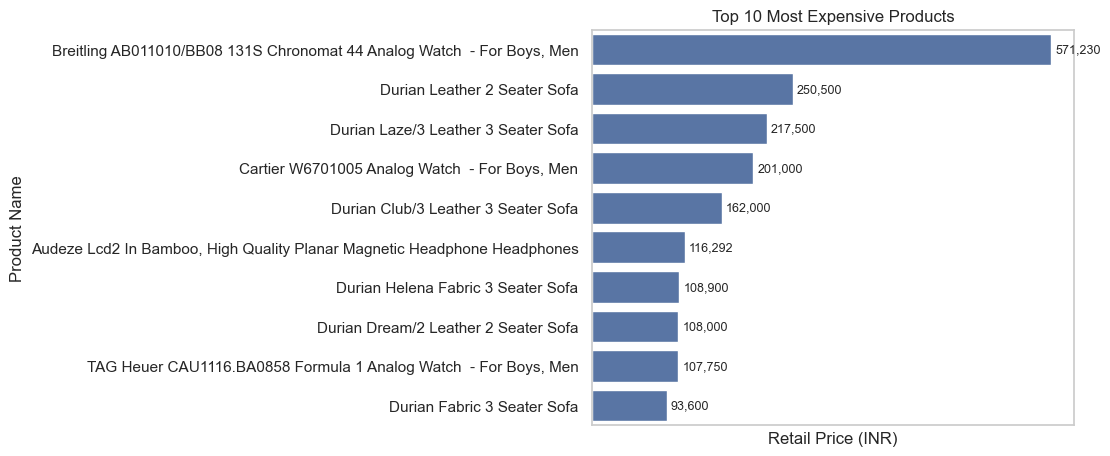

In [34]:
plt.figure(figsize=(11, 5))
sns.barplot(x="retail_price", y="product_name", data=top_expensive, errorbar=None)
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Retail Price (INR)")
plt.ylabel("Product Name")
plt.tight_layout()
for i, (value, name) in enumerate(zip(top_expensive["retail_price"], top_expensive["product_name"])):
    plt.text(value + 5000, i, f"{int(value):,}", va='center', fontsize=9)
plt.xticks([])
plt.savefig("../visuals/top_expensive_products.png")
plt.show()

## Analyze Ratings

### Ratings Distribution

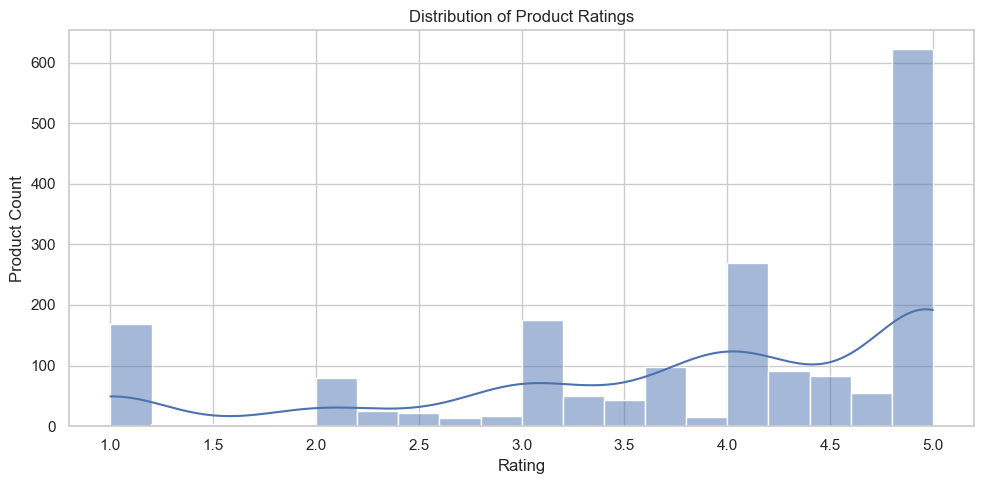

In [35]:
plt.figure(figsize=(10, 5))
sns.histplot(df['product_rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Product Count")
plt.tight_layout()
plt.savefig("../visuals/ratings_distribution.png")
plt.show()

### Top 10 Rated Products

In [57]:
rated_df = df[df['product_rating'].notnull() & (df['product_rating'] >= 4.5)]
rated_df = rated_df.drop_duplicates(subset="product_name", keep="first")
rated_df = rated_df.sort_values(by=["product_rating", "retail_price"], ascending=[False, False]).head(10)
top_rated = rated_df.head(10)
top_rated[["product_name", "brand", "product_rating", "retail_price"]]

,product_name,brand,product_rating,retail_price
11490,Durian Clinton/A/3 Leather 3 Seater Sofa,Durian,5.0,73500.0
12882,Ratnam Gold Diamond 18 K Ring,Ratnam,5.0,49999.0
11660,Durian Berry Solid Wood 3 Seater Sofa,Durian,5.0,48600.0
9951,HP 15-ac116TX (Notebook) (Core i3 (5th Gen)/ 4...,HP,5.0,38890.0
7088,Linksys EA6700 Dual Band N450+AC1300 HD Video Pro,Linksys,5.0,21999.0
10080,SS Ton Professional English Willow Cricket Bat,Unknown,5.0,13599.0
6514,NETGEAR WNDR4000 N750 WIRELESS DUAL BAND GIGAB...,Netgear,5.0,12900.0
9643,Ciemme 0.11 CT Women's Designer Circle Flower ...,Ciemme,5.0,11455.0
6998,Netgear D3600 N600 Dual Band Gigabit Wi-Fi Mod...,Netgear,5.0,9600.0
5862,TRENDnet TEW-752DRU,TRENDnet,5.0,8999.0


### Average Rating by Brand

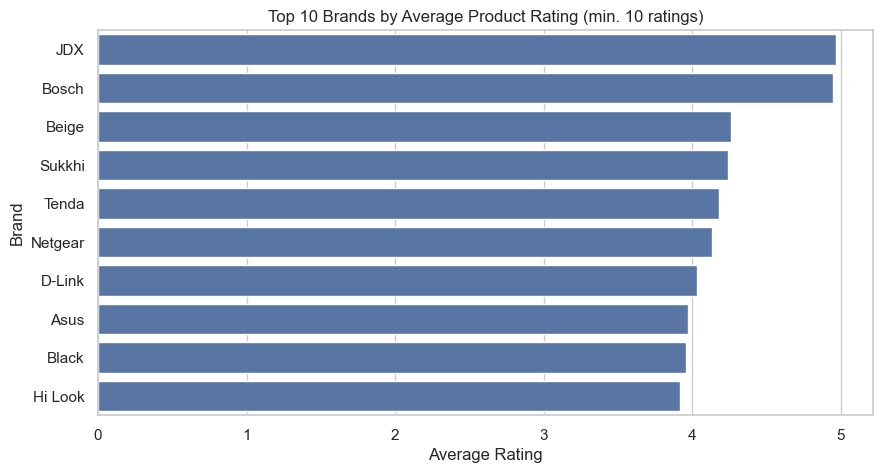

In [62]:
rated_df = df[df['product_rating'].notnull()]

# Group by brand, compute average rating and rating count
brand_ratings = (
    rated_df.groupby('brand')['product_rating']
    .agg(['mean', 'count'])
    .sort_values(by='mean', ascending=False)
)

top_rated_brands = brand_ratings[brand_ratings['count'] >= 10].head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_brands['mean'], y=top_rated_brands.index)
plt.title("Top 10 Brands by Average Product Rating (min. 10 ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.savefig("../visuals/avg_ratings_by_brands.png")
plt.show()

## Top Categories by Product Listings

/var/folders/n2/ysnsj_p14xj8ycj6y2rkg1yr0000gn/T/ipykernel_206/1382318114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, hue=None, legend=False, palette="viridis")


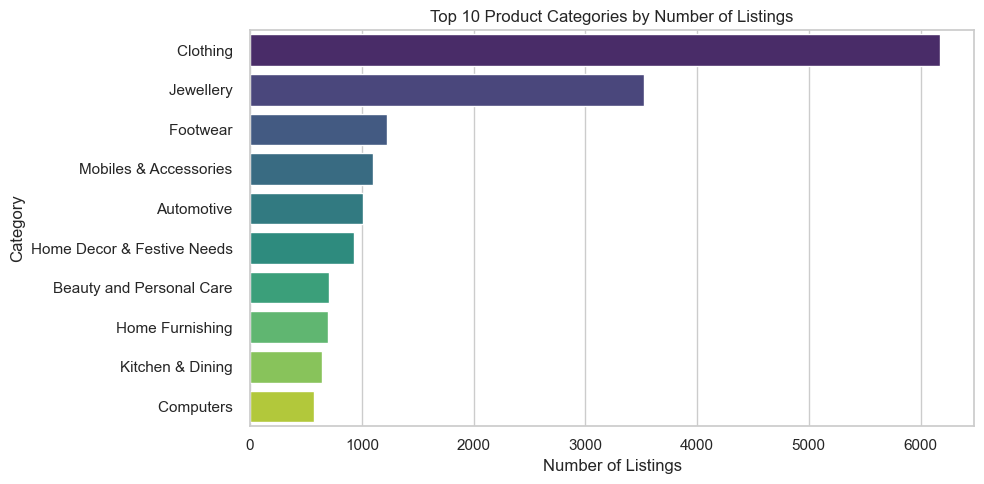

In [71]:
df['top_category'] = df['product_category_tree'].str.extract(r'\"([^>>\"]+)', expand=False)

category_counts = df['top_category'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.values, y=category_counts.index, hue=None, legend=False, palette="viridis")
plt.title("Top 10 Product Categories by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig("../visuals/top_categories_by_listings.png")
plt.show()